In [ ]:
! pip install qiskit

# Primera parte de la Actividad

In [ ]:
#importemos las dependencias:
from qiskit import *

In [ ]:
# comprobemos la versión instalada:
for elem, vers in qiskit.__qiskit_version__.items():
  print(elem, vers)

qiskit-terra 0.18.3
qiskit-aer 0.9.1
qiskit-ignis 0.6.0
qiskit-ibmq-provider 0.17.0
qiskit-aqua 0.9.5
qiskit 0.31.0
qiskit-nature None
qiskit-finance None
qiskit-optimization None
qiskit-machine-learning None


/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


**Un par de notas antes de empezar con el ejercicio:**

> Los circuitos o algorimos empleados en programación cuántica son una combinacion de **elemntos cuánticos** y **elementos clásicos**:
  *   Los elementos cuánticos son empleados para realizar operaciones sobre los cúbits, como pueden ser rotaciones sobre unos de los ejes.
  *   Los elementos clásicos son empleados para realizar operaciones clásicas sobre las medidas obtenidas.

In [ ]:
# Creemos el registro para un circuito cuántoco de dos cúbits:
qr = QuantumRegister(2)

# También nos hará falta un registro clasico para la misma cantidad de cúbits:
cr =ClassicalRegister(2)

# Veamos que hemos creado.
qr, cr

(QuantumRegister(2, 'q0'), ClassicalRegister(2, 'c0'))

In [ ]:
# Con los elementos creados anteriormente creemos un circuito con el que trabajar:
circuit = QuantumCircuit(qr, cr)
circuit



> Pero esto no nos dice nada. <br>
Dibujemos el circuito entonces:



In [ ]:
#nos faltará este paquete en matplotlib
! pip install pylatexenc

In [ ]:
# añadamos mathplotlib para la presente linea:
%matplotlib inline

In [ ]:
#dibujemos el dicuito creado:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

**Creemos primero entrelazamientop entre ambos Cúbits**

> Para ello, lo primero será aplicar una puerta Hadamard al primer cúbti de forma que entre en un estado de superposición equiprobable, dicho de forma sencilla, la puerta Hadamard lo que hace es obligar al cúbit al que se le aplica a pasar de un estado cásico *|0〉*, *|1〉* a un estado en el que ambos estados son igual de probables.





In [ ]:
circuit.h(qr[0])
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

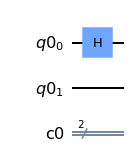

In [ ]:
#si queremos ponerlo mas bonito:
circuit.draw(output='mpl')

**Ahora crearemos el entrelazamiento cuántico:**
 > Para ello emplearemos una puerta de control, la labor de estas puertas consiste en establecer un cierto “control” a la hora de obtener un resultado, ya que establecen una dependencia entre el cúbit de control y el resto, aplicando a los cúbits que “dependientes” un resultado u otro en función del estado de cúbit de control.

La puerta empleada en este caso es una **CX** o *Controlled-X gate* cuya función es la misma que la de una puerta NOT clásica, asigna al cúbit dependiente el estado contrario del obtenido en el cúbit de control.

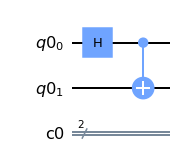

In [ ]:
#El cúbit de control será el qr[0] y el target u objetivo el qr[1]
circuit.cx(qr[0], qr[1])

#Dibujemos el circuito creado:
circuit.draw(output='mpl')

**Midamos por último el estado de los cúbits**
  > Dado que hemos establecido una superposicion en el qr[0] al inicio del ejercicio no sabremos cual es el resultado del algoritmo creado hasta realizar una medidción del mismo:

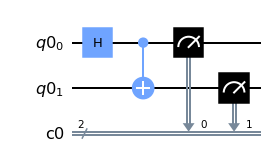

In [ ]:
circuit.measure(qr, cr)

#Dibujemos el correspondiente esquema:
circuit.draw(output='mpl')

## Ejecutemos el ejercicio en nuestro ordenador:

In [ ]:
bcknd_simulator = Aer.get_backend('qasm_simulator')
bcknd_simulator

QasmSimulator('qasm_simulator')

In [ ]:
# Opción 1
job_sim = execute(circuit, backend=bcknd_simulator)
job_sim

In [ ]:
res = job_sim.result()
res

Result(backend_name='qasm_simulator', backend_version='0.9.1', qobj_id='ca51ac8b-edfb-4a77-89f7-54074a576c4b', job_id='b0b5300f-3c52-4756-808a-07b8f1bc6aa6', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 503, '0x0': 521}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-9', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=999676365, metadata={'parallel_state_update': 2, 'noise': 'ideal', 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'fusion': {'enabled': False}}, time_taken=0.0025508840000000002)], date=2021-10-13T10:26:56.560672, status=COMPLETED, status=QobjHeader(backend_name='qasm_simula

In [ ]:
res.status

'COMPLETED'

**Ploteenmos el resultado obtenido:**

In [ ]:
from qiskit.tools.visualization import plot_histogram

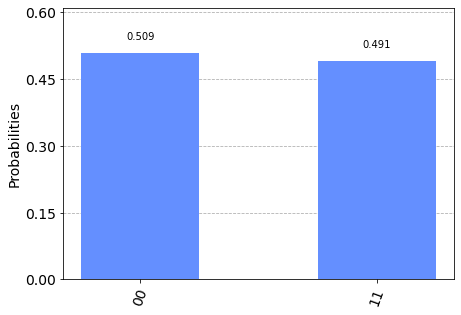

In [ ]:
plot_histogram(res.get_counts(circuit))

## Ejecución en el computador de IBM

In [ ]:
# importemos las dependencias pertinentes:
from qiskit import IBMQ

In [ ]:
# por motivos de seguridad esta celda será reescrita tras sue ejecución
#IBMQ.save_account('API_TOKEN')

In [ ]:
#carguemos la cuenta:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
#obtengamos el proveedor de servicios:
prov = IBMQ.get_provider('ibm-q')
prov

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
prov.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [ ]:
# de entre todos los que hay elegiremos uno de los computadores:
qcomp = prov.get_backend('ibmq_manila')
qcomp

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
job = execute(circuit, backend=qcomp)
job

In [ ]:
from qiskit.tools.monitor import job_monitor

In [ ]:
job_monitor(job)

Job Status: job has successfully run


In [ ]:
res = job.result()
res

Result(backend_name='ibmq_manila', backend_version='1.0.11', qobj_id='00b8099d-11fd-486c-bb53-0042298d76a9', job_id='6166b910d1e11004243730d9', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 495, '0x1': 25, '0x2': 35, '0x3': 469}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-9', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2021-10-13 10:51:43+00:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_manila', backend_version='1.0.11'), execution_id='8a87fa52-2c13-11ec-ba92-bc97e15b08d0', time_taken=5.488465309143066, error=None, client_version={'qiskit': '0.31.0'})

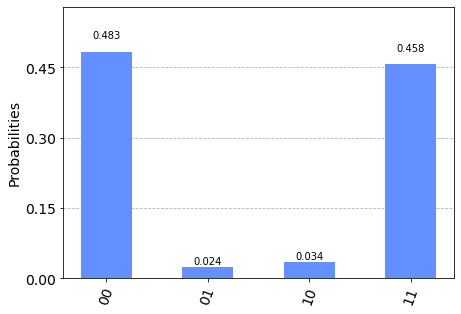

In [ ]:
plot_histogram(res.get_counts(circuit))

# Segunda parte de la actividad

Los Estados de Bell son una serié de estados que conforman una base ortonormal, esto implica que los vectores formados por esta base son ortogonales y linealmente independientes entre sí, pero ¿qué son los Estados de Bell realmente? Son cuatro estados de entrelazamiento cuántico entre dos cúbits excluyentes entre sí, se pueden agrupar en dos familias, una de ellas la negada y otra la directa.
La negada implicaría que el cúbit de control posee el estado contrario al cúbit dependiente y la directa implica que el cúbit de control posee el mismo estado que el cúbit dependiente.

# Tercera parte de la actividad

Se han suprimido varios pasos ya que ahora mismo no los he considerados importantes ya que se refieren el traamiento de errores y prefiero dar prioridad a entender el funcionamiento del módulo

In [2]:
# empecemos instalando el módulo:
! pip install --quiet cirq

In [3]:
#importemos las librerias pertinentes
import cirq
import cirq_google

Empecemos creando un set de cúbits para trabajar con ellos:

Con Cirq Existen trs posibilidades:

*   cirq.NamedQubit: Emplado para dar nombre a los cúbits
*   cirq.LineQubit: Empleado para nombrar los cúbits segun su linea
*   cirq.GridQubit: Empleado para asignar dor valores numéricos a los cubits

Ilustreemos esto con varios ejemplos

In [ ]:
# Dar Nombre a los cúbit puede ser util a la hora de emplear ciertos algoritmos y saber sobre "quien" lo estamos aplicando
q0 = cirq.NamedQubit('control')
q1 = cirq.NamedQubit('dependiente')

# Los cubit creados de forma linal pueden crearse de forma indivcidual
q3 = cirq.LineQubit(3)
# o empleando rangos:
q4, q5, q6 = cirq.LineQubit.range(3)

# Al igual que en el caso anterior, se puede crear un cúbit individual
q7_8 = cirq.GridQubit(4,5)
# o en rango:
q_all = cirq.GridQubit.square(4)


Cirque pone ta,bien a nuestra disposicion juegos de cúbits precreados, estos juegos se denominan Dispositivos (en ingles Devices) y poseen una série de normas y reglas preestabledicas para su uso.







---



---



Google distingue entre puertas y operaciones del siguiente modo:

*   Denomina **Puerta** al efecto o acción que puede ser aplicado a un conjunto de cúbits 
*   Denomina **Operación** a la aplicación de una puerta a un conjunto de cúbits

Así mismo, establece ciertas jerarquías a en la creación de circuitos:

*   Establece que un **circuito** es un conjunto o colección de **momentos**
*   Denomina **momento** al conjunto de **operaciones** que se ejecutan en el mismo bloque de tiempo 


In [5]:
circuit = cirq.Circuit()
# Se puede crear un circuito simplemente añadiendo los elementos:
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
# esto establecerá todas las puertas en el miemo Momento ya que no hay solapamiento.
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [6]:
# Para establecer cada puerta en un momento diferente:
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───




---



---




El resultado de un circuito pyuede ser calculado mediante una simulacion ejecutando el código en nuestro PC pero para obtener el resultado real habrá que emplear un ordenador real.

In [8]:
# Crearemos un circuito para generar los estados de Bell descrios en el apartado anterior:

# creamos el ciercuito
bell_circuit = cirq.Circuit()
# generamos los cúbits
q0, q1 = cirq.LineQubit.range(2)
# añadimos puertas Hadarmd
bell_circuit.append(cirq.H(q0))
# generamos un circuitos de control
bell_circuit.append(cirq.CNOT(q0,q1))

# Inicializamos el mimulador
s=cirq.Simulator()

print('Simulate the circuit:')
results=s.simulate(bell_circuit)
print(results)
print()

# Añadimos una medición al final de la linea 
bell_circuit.append(cirq.measure(q0, q1, key='result'))

print('Sample the circuit:')
samples=s.run(bell_circuit, repetitions=1000)
# Imprimos por pantalla el histograma de resultados
print(samples.histogram(key='result'))

Simulate the circuit:
measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩

Sample the circuit:
Counter({3: 502, 0: 498})


# Cuarta parte de la actividad

## Certificaciones SQL

Para realizar certificaciones en el módulo Postgres SQL he hallado varias páginas, la que mas me ha llamado la atencion ha sido la siguiente:
> https://www.todopostgresql.com/certificaciones-postgresql/

además de la certificación mencionada, he encontrado una pagina que sugiere 5 certifiaciónes SQL:

>  https://www.coursera.org/articles/sql-certifications-for-your-data-career

## Certificaciones NoSQL

En este caso en la pagina oficial de MongoDB, se ofrece un examen de certificacion en el módulo.

>  https://university.mongodb.com/certification

Además de la mecionada, he hallado una página en la que se recomiendan unas cuantas certificaciones no sql:

>  https://data-xtractor.com/blog/databases/all-nosql-certifications-in-2021/

## Certificaciones en BIG DATA

En lo que respecta a Big Data es facil hallar diversas páginas que ofrezcan certifiacdos como data Architect, Engineer o Scientist. Entre ellos el que mas me ha llamado la atencion es IBM que ofrece Certificacion en los tres ámbitos

>*Architect*: https://www-03.ibm.com/certify/certs/50001701.shtml
>
>*Engineer*: https://www-03.ibm.com/certify/certs/50001501.shtml
>
>*Scientist*: https://www.opengroup.org/certifications/certified-data-scientist-open-cds
 
